** WORLD HAPPINESS REPORT ANALYSIS**    
    
The World Happiness Report is a landmark survey of the state of global happiness. The World Happiness Report 2015, 2016 and 2017, which ranks about 160 countries by their happiness levels, was released on past years at a launch event at the Pontifical Academy of Sciences in the Vatican.

Now, Lets analyze data...

**IMPORTING DATA PART**

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import plotly.offline as py
py.init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Input data 

In [4]:
data = pd.read_csv('happiness_score_dataset.csv')

**What kind of information we have in World Happiness Report (2015)?**

In [5]:
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [7]:
data.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [8]:
data.rename(columns = {'Happiness Rank' : 'Happiness_Rank',
                           'Happiness Score' : 'Happiness_Score',
                           'Standard Error' : 'Standard_Error',
                           'Economy (GDP per Capita)' : 'Economy',
                           'Health (Life Expectancy)' : 'Health',
                          'Trust (Government Corruption)' : 'Trust',
                          'Dystopia Residual' : 'Dystopia_Residual'}, inplace = True)



**I renamed column names; in this way, I can work with dataset easily. I become aware of different information between 2015-2016-2017 years report. In 2015, we have 'standard error' column, but in 2016/17 this information defined in a different way(Upper and lower values). Now, we fix this...**





**Check Out Correlation**



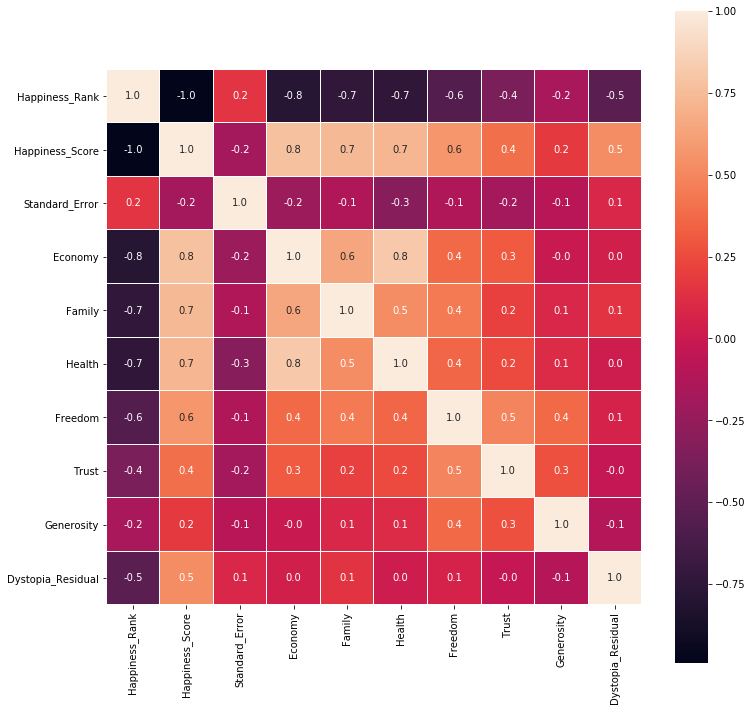

In [11]:
f,ax = plt.subplots(figsize = (12, 12))
sns.heatmap(data.corr(), annot = True, linewidths = 0.1, fmt = '.1f', ax = ax, square = True)




**Lets visualize this dataset with different visualization tools.**




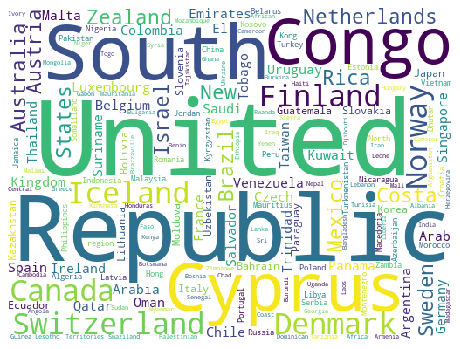

In [13]:
x = data['Country']
plt.subplots(figsize=(8,8))
wordcloud = WordCloud(
                          background_color = 'white',
                          width = 512,
                          height = 384
                         ).generate(" ".join(x))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')
plt.show()

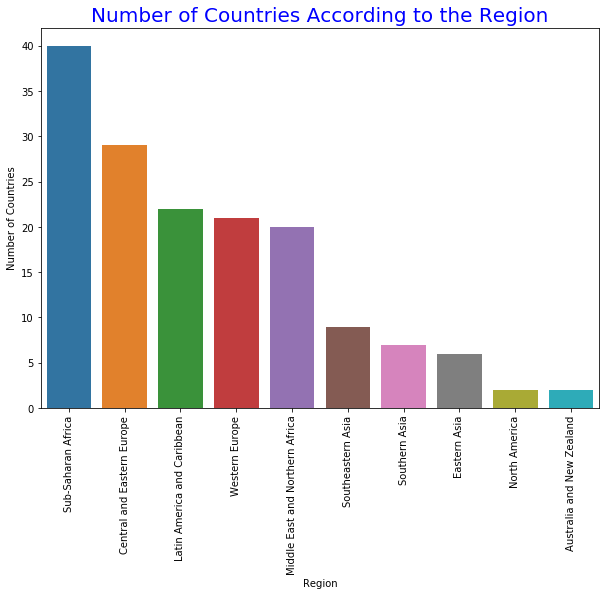

In [14]:
dt = data.Region.value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x = dt.index, y = dt.values)
plt.xlabel('Region')
plt.xticks(rotation = 90)
plt.ylabel('Number of Countries')
plt.title('Number of Countries According to the Region', color = 'blue', fontsize = 20)
plt.show()

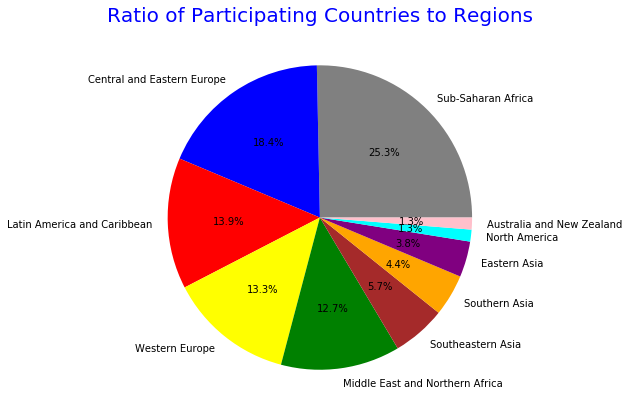

In [15]:
labels = data.Region.value_counts().index
colors = ['grey', 'blue', 'red', 'yellow', 'green', 'brown', 'orange', 'purple', 'cyan', 'pink']
explode = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sizes = data.Region.value_counts().values

plt.figure(figsize = (7,7))
plt.pie(sizes, explode = explode, labels = labels, colors = colors, autopct = '%1.1f%%')
plt.title("Ratio of Participating Countries to Regions", color = 'blue', fontsize = 20)
plt.show()

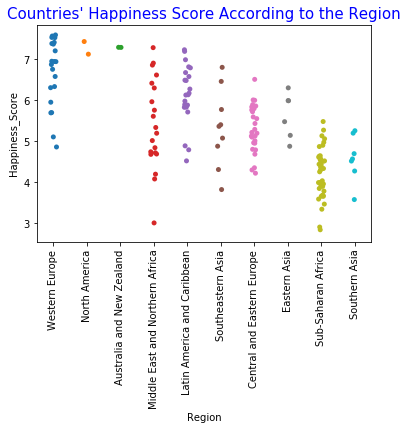

In [17]:
x = sns.stripplot(x = "Region", y = "Happiness_Score", data = data, jitter = True)
plt.xticks(rotation = 90)
plt.title("Countries' Happiness Score According to the Region", color = 'blue', fontsize = 15)
plt.show()

In [18]:
data.mean()

Happiness_Rank       79.493671
Happiness_Score       5.375734
Standard_Error        0.047885
Economy               0.846137
Family                0.991046
Health                0.630259
Freedom               0.428615
Trust                 0.143422
Generosity            0.237296
Dystopia_Residual     2.098977
dtype: float64

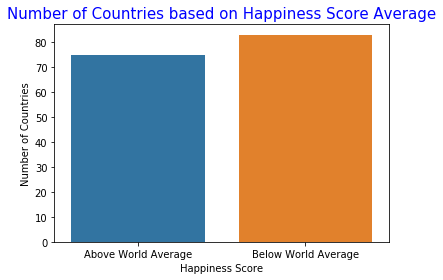

In [19]:
above_mean_HS =['Above World Average' if i >= 5.35 else 'Below World Average' for i in data.Happiness_Score]
df = pd.DataFrame({'Happiness_Score' : above_mean_HS})
sns.countplot(x = df.Happiness_Score)
plt.xlabel('Happiness Score')
plt.ylabel('Number of Countries')
plt.title('Number of Countries based on Happiness Score Average', color = 'blue', fontsize = 15)
plt.show()

In [20]:
trace1 = go.Box(
    y = data.Economy,
    name = 'Economic Situations of Countries in 2017',
    marker = dict(
        color = 'rgb(12, 12, 140)',
    )
)
trace2 = go.Box(
    y = data.Trust,
    name = 'Government Corruption Index in 2017',
    marker = dict(
        color = 'rgb(12, 128, 128)',
    )
)
data = [trace1, trace2]
iplot(data)

In [21]:
dataframe = data

trace1 = go.Scatter(
    x = dataframe.Happiness_Rank,
    y = dataframe.Economy,
    name = "Economy",
    marker = dict(color = 'rgba(16, 112, 2, 0.8)')
                    )
# second line plot
trace2 = go.Scatter(
    x = dataframe.Happiness_Rank,
    y = dataframe.Trust,
    xaxis = 'x2',
    yaxis = 'y2',
    name = "Gov. Corruption",
    marker = dict(color = 'rgba(160, 112, 20, 0.8)')
                    )
data = [trace1, trace2]
layout = go.Layout(
        xaxis2 = dict(
            domain = [0.65, 0.95],
            anchor = 'y2'        
                     ),
        yaxis2 = dict(
            domain = [0.65, 0.95],
            anchor = 'x2'
                     ),
    title = 'Economy and Government Corruption Correlation'
                  )
fig = go.Figure(data = data, layout = layout)
iplot(fig)

AttributeError: 'list' object has no attribute 'Happiness_Rank'

In [22]:
import plotly.figure_factory as ff

dataframe = data
dt2017 = dataframe.loc[:,["Economy", "Health", "Freedom"]]
dt2017["index"] = np.arange(1, len(dt2017) + 1)

fig = ff.create_scatterplotmatrix(dt2017, diag = 'box', index = 'index', colormap = 'Portland',
                                  colormap_type = 'cat',
                                  height = 700, width = 700)
iplot(fig)

AttributeError: 'list' object has no attribute 'loc'

In [ ]:
dataframe = data2017
trace1 = go.Scatter3d(
    x = dataframe.Economy,
    y = dataframe.Freedom,
    z = dataframe.Health,
    mode = 'markers',
    marker = dict(
        size = 7,
        color = 'rgb(255,0,0)'     
                 )
                      )
data = [trace1]
layout = go.Layout(
    title = 'Happiness Status According to the Economy, Freedom and Health',
    margin = dict(
        l = 0,
        r = 0,
        b = 0,
        t = 30  
                )
                  )
fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [ ]:
dataframe = data2017
trace1 = go.Scatter(
    x = dataframe.Happiness_Rank,
    y = dataframe.Economy,
    name = "Economy"
                    )
trace2 = go.Scatter(
    x = dataframe.Happiness_Rank,
    y = dataframe.Health,
    xaxis = 'x2',
    yaxis = 'y2',
    name = "Health"
                    )
trace3 = go.Scatter(
    x = dataframe.Happiness_Rank,
    y = dataframe.Freedom,
    xaxis = 'x3',
    yaxis = 'y3',
    name = "Freedom"
)
trace4 = go.Scatter(
    x = dataframe.Happiness_Rank,
    y = dataframe.Trust,
    xaxis = 'x4',
    yaxis = 'y4',
    name = "Gov. Corruption"
)
data = [trace1, trace2, trace3, trace4]
layout = go.Layout(
    xaxis = dict(
        domain = [0, 0.45]
                ),
    yaxis = dict(
        domain = [0, 0.45]
                ),
    xaxis2 = dict(
        domain = [0.55, 1]
                 ),
    xaxis3 = dict(
        domain = [0, 0.45],
        anchor = 'y3'
                 ),
    xaxis4 = dict(
        domain = [0.55, 1],
        anchor = 'y4'
                 ),
    yaxis2 = dict(
        domain = [0, 0.45],
        anchor = 'x2'
                 ),
    yaxis3 = dict(
        domain = [0.55, 1]
                 ),
    yaxis4 = dict(
        domain = [0.55, 1],
        anchor = 'x4'
                 ),
    title = 'Economy, Health, Freedom and Gov. Corruption Effect in Happiness Rank of Countries'
)
fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [ ]:
df = data2017.iloc[:100, :]

import plotly.graph_objs as go

trace1 = go.Scatter(
                    x = df.Happiness_Rank,
                    y = df.Economy,
                    mode = "lines + markers",
                    name = "Economy",
                    marker = dict(color = 'rgba(55, 20, 50, 0.9)'),
                    text = df.Country
                    )
trace2 = go.Scatter(
                    x = df.Happiness_Rank,
                    y = df.Freedom,
                    mode = "lines + markers",
                    name = "Freedom",
                    marker = dict(color = 'rgba(10, 180, 80, 0.9)'),
                    text = df.Country
                    )

data = [trace1, trace2]
layout = dict(title = 'Economy and Freedom Relations in Happiness Rank Top 100 Countries',
             xaxis = dict(title = 'Happiness Rank', ticklen = 5, zeroline = True)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

In [ ]:
df2017 = data2017.iloc[:3, :]

import plotly.graph_objs as go

trace1 = go.Bar(
                x = df2017.Country,
                y = df2017.Economy,
                name = "Economy",
                marker = dict(color = 'rgba(125, 25, 200, 0.8)',
                             line = dict(color = 'rgb(0,0,0)', width = 1.5))
                )
trace2 = go.Bar(
                x = df2017.Country,
                y = df2017.Family,
                name = "Family",
                marker = dict(color = 'rgba(25, 25, 25, 0.8)',
                             line = dict(color = 'rgb(0,0,0)', width = 1.5))
                )
trace3 = go.Bar(
                x = df2017.Country,
                y = df2017.Health,
                name = "Health",
                marker = dict(color = 'rgba(190, 200, 100, 0.8)',
                             line = dict(color = 'rgb(0,0,0)', width = 1.5))
                )
trace4 = go.Bar(
                x = df2017.Country,
                y = df2017.Trust,
                name = "Trust",
                marker = dict(color = 'rgba(50, 150, 50, 0.8)',
                             line = dict(color = 'rgb(0,0,0)', width = 1.5))
                )
trace5 = go.Bar(
                x = df2017.Country,
                y = df2017.Generosity,
                name = "Generosity",
                marker = dict(color = 'rgba(255, 70, 12, 0.8)',
                             line = dict(color = 'rgb(0,0,0)', width = 1.5))
                )
trace6 = go.Bar(
                x = df2017.Country,
                y = df2017.Freedom,
                name = "Freedom",
                marker = dict(color = 'rgba(255, 25, 55, 0.8)',
                             line = dict(color = 'rgb(0,0,0)', width = 1.5))
                )
data = [trace1, trace2, trace3, trace4, trace5, trace6]
layout = go.Layout(barmode = 'group', title = 'Top 3 Countries in 2017 According to the Different Parameters')
fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [ ]:
df2017 = data2017.iloc[:3, :]

import plotly.graph_objs as go

trace1 = {
  'x': df2017.Country,
  'y': df2017.Economy,
  'name': 'Economy',
  'type': 'bar'
};
trace2 = {
  'x': df2017.Country,
  'y': df2017.Family,
  'name': 'Family',
  'type': 'bar'
};
trace3 = {
  'x': df2017.Country,
  'y': df2017.Health,
  'name': 'Health',
  'type': 'bar'
};
trace4 = {
  'x': df2017.Country,
  'y': df2017.Trust,
  'name': 'Trust',
  'type': 'bar'
};
trace5 = {
  'x': df2017.Country,
  'y': df2017.Generosity,
  'name': 'Generosity',
  'type': 'bar'
};
trace6 = {
  'x': df2017.Country,
  'y': df2017.Freedom,
  'name': 'Freedom',
  'type': 'bar'
};
data = [trace1, trace2, trace3, trace4, trace5, trace6];
layout = {
  'xaxis': {'title': 'Top 3 Countries'},
  'barmode': 'relative',
  'title': 'Top 3 Countries in 2017 According to the Different Parameters'
};
fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [ ]:
df = data.iloc[:30, :]  

import plotly.graph_objs as go

trace1 = go.Scatter(
                    x = df.Country,
                    y = df.Freedom,
                    mode = "markers",
                    name = "year",
                    marker = dict(color = 'rgba(55, 20, 50, 0.8)'),
                    text = df2015.Happiness_Rank
                    )

data = [trace1, trace2, trace3]
layout = dict(title = 'Freedom vs Happiness Rank of Top 30 Countries in 2015, 2016 and 2017 Years',
             xaxis = dict(tickangle = 315, ticklen = 3, zeroline = False),
             yaxis = dict(title = 'Freedom', ticklen = 3, zeroline = False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

In [23]:
data = dict(type = 'choropleth', 
           locations = data['Country'],
           locationmode = 'country names',
           z = data['Happiness_Rank'],
           colorbar = {'title':'Happiness Scale'})
layout = dict(title = 'Global Happiness Ranking', 
             geo = dict(showframe = False, 
                       projection = {'type': 'natural earth'}))
choromap = go.Figure(data = [data], layout = layout)
iplot(choromap)

TypeError: list indices must be integers or slices, not str

**CONCLUSION**

**-Thanks for comments and upvotes.**

